<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n20.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.264098,81.650869,51.599772,4.379028e-06,189.514744,189.514771,-0.000027
1,0.0,1.0,81.840958,62.942708,43.787942,6.377782e-06,198.571615,198.571577,0.000038
2,0.0,2.0,94.724574,31.887939,94.638143,-1.704051e-04,231.250486,231.250500,-0.000013
3,0.0,3.0,64.153591,86.125996,32.669788,3.773433e-07,192.949375,192.949460,-0.000085
4,0.0,4.0,32.515947,94.512432,54.863752,-2.812337e-06,191.892129,191.892232,-0.000104
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.829876,89.732314,99.132256,-6.868222e-06,267.694438,267.694332,0.000107
19996,999.0,16.0,93.078455,26.826459,87.898646,-2.240798e-04,217.803337,217.803483,-0.000146
19997,999.0,17.0,98.553324,40.635125,27.790039,5.066224e-05,176.978538,176.978513,0.000025
19998,999.0,18.0,48.973211,89.035677,62.449359,-1.620304e-05,210.458230,210.458235,-0.000005


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.264098,81.650869,51.599772,4.379028e-06,189.514744,189.514771,-0.000027
1,0.0,1.0,81.840958,62.942708,43.787942,6.377782e-06,198.571615,198.571577,0.000038
2,0.0,2.0,94.724574,31.887939,94.638143,-1.704051e-04,231.250486,231.250500,-0.000013
3,0.0,3.0,64.153591,86.125996,32.669788,3.773433e-07,192.949375,192.949460,-0.000085
4,0.0,4.0,32.515947,94.512432,54.863752,-2.812337e-06,191.892129,191.892232,-0.000104
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.829876,89.732314,99.132256,-6.868222e-06,267.694438,267.694332,0.000107
19996,999.0,16.0,93.078455,26.826459,87.898646,-2.240798e-04,217.803337,217.803483,-0.000146
19997,999.0,17.0,98.553324,40.635125,27.790039,5.066224e-05,176.978538,176.978513,0.000025
19998,999.0,18.0,48.973211,89.035677,62.449359,-1.620304e-05,210.458230,210.458235,-0.000005


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.264098,81.650869,51.599772,4.379028e-06,189.514744,189.514771,-0.000027
1,0.0,1.0,81.840958,62.942708,43.787942,6.377782e-06,198.571615,198.571577,0.000038
2,0.0,2.0,94.724574,31.887939,94.638143,-1.704051e-04,231.250486,231.250500,-0.000013
3,0.0,3.0,64.153591,86.125996,32.669788,3.773433e-07,192.949375,192.949460,-0.000085
4,0.0,4.0,32.515947,94.512432,54.863752,-2.812337e-06,191.892129,191.892232,-0.000104
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.829876,89.732314,99.132256,-6.868222e-06,267.694438,267.694332,0.000107
19996,999.0,16.0,93.078455,26.826459,87.898646,-2.240798e-04,217.803337,217.803483,-0.000146
19997,999.0,17.0,98.553324,40.635125,27.790039,5.066224e-05,176.978538,176.978513,0.000025
19998,999.0,18.0,48.973211,89.035677,62.449359,-1.620304e-05,210.458230,210.458235,-0.000005


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

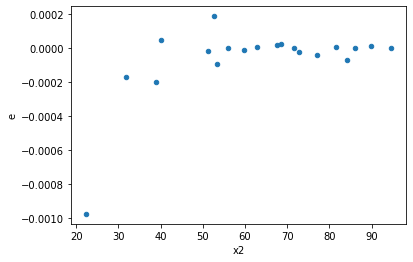

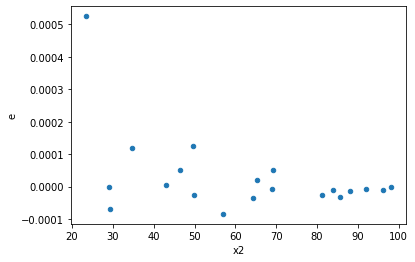

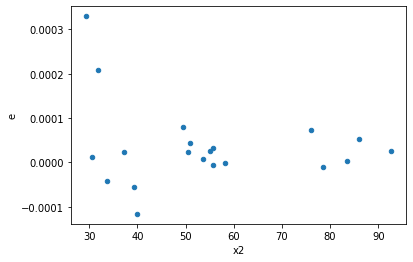

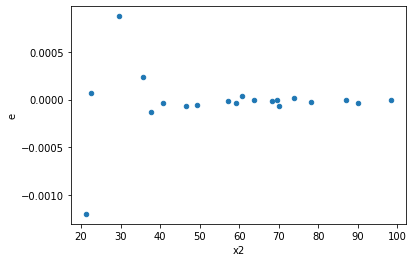

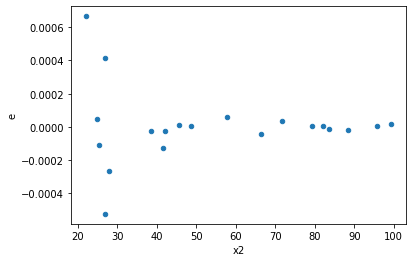

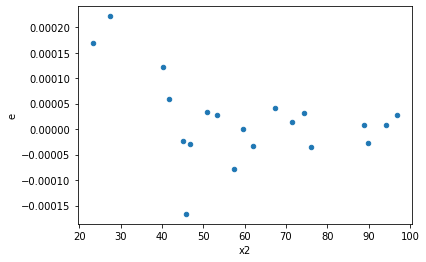

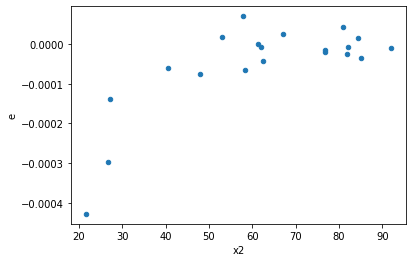

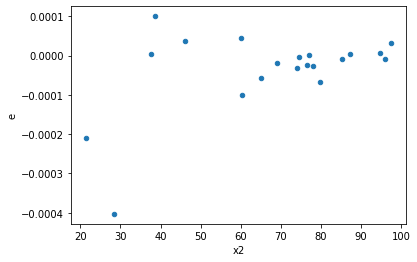

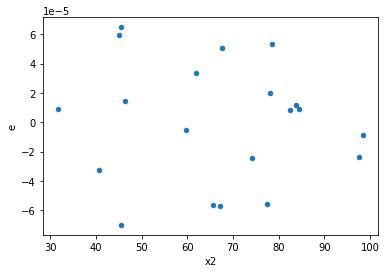

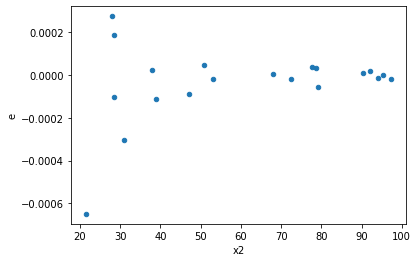

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
564.0,5.0,5.0,7.033064148114606e-09,5.7009833110164945e-09,1.7582660370286515e-09,1.4252458277541236e-09,1.2336580839526436,0.8233823195544141,0.588308840222793,Reject001=1 : Homoscedasticity
725.0,5.0,5.0,2.8049031683554085e-08,1.2717928215734195e-08,7.012257920888521e-09,3.1794820539335487e-09,2.205471772426956,0.40573995374493843,0.7971300231275308,Reject001=1 : Homoscedasticity
731.0,5.0,5.0,7.779741686272386e-09,2.046465195077537e-09,1.9449354215680966e-09,5.116162987693843e-10,3.80155094012123,0.16907958942584256,0.9154602052870787,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,3.622532299799627e-09,1.7981133571913173e-07,9.056330749499067e-10,4.495283392978293e-08,0.020146295478601427,0.0005829200118236637,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,2.2378432441719964e-09,1.6671600568645261e-07,5.594608110429991e-10,4.1679001421613153e-08,0.013423085773664526,0.00021626761903813075,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2.8986762758664905e-09,8.368014236715098e-08,7.246690689666226e-10,2.0920035591787744e-08,0.034639953922979694,0.0021490152692730468,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,1.335126455471752e-09,1.5687081543371499e-06,3.33781613867938e-10,3.9217703858428747e-07,0.0008510993276731601,2.2890746911262275e-07,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,3.447504817935366e-09,4.489616090588341e-07,8.618762044838415e-10,1.1224040226470852e-07,0.007678841015298456,5.462702668537346e-05,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,2.0226742708049454e-09,2.5278808955949178e-08,5.056685677012363e-10,6.319702238987294e-09,0.08001461913532615,0.014962490488940534,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,3.6736754920957515e-09,2.9324630752385238e-08,9.184188730239379e-10,7.3311576880963096e-09,0.1252761040067636,0.03968992779054115,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,1.7915674369822479e-09,4.38193202874503e-08,4.4789185924556197e-10,1.0954830071862575e-08,0.04088533152111322,0.0031835660351435618,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,6.463263029415985e-09,1.0020463734639909e-08,1.6158157573539963e-09,2.5051159336599772e-09,0.6450063790035009,0.6421158963139315,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    877
Reject001=1 : Homoscedasticity      123
Name: Result_test, dtype: int64